In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input



In [9]:
train_dir = 'intel_data/seg_train'
test_dir = 'intel_data/seg_test'


In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')

val_gen = train_datagen.flow_from_directory(train_dir,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='validation')

test_gen = test_datagen.flow_from_directory(test_dir,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)


Found 11228 images belonging to 1 classes.
Found 2806 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


In [11]:
model = models.Sequential([
    Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=10,
                    callbacks=[EarlyStopping(patience=3)])


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 1066s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9761 - val_loss: 1.5710
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9751 - val_loss: 1.6390
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9751 - val_loss: 1.6320
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9765 - val_loss: 1.5680
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9765 - val_loss: 1.5476
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9754 - val_loss: 1.6227
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9758 - val_loss: 1.6087
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 1.0

In [18]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 59s 632ms/step - accuracy: 0.9654 - loss: 2.4495
Test Accuracy: 0.9653


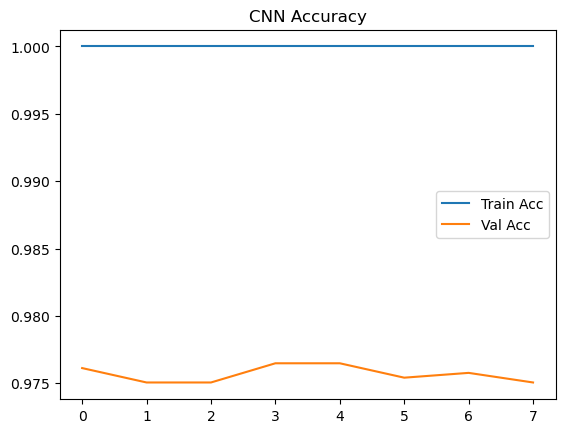

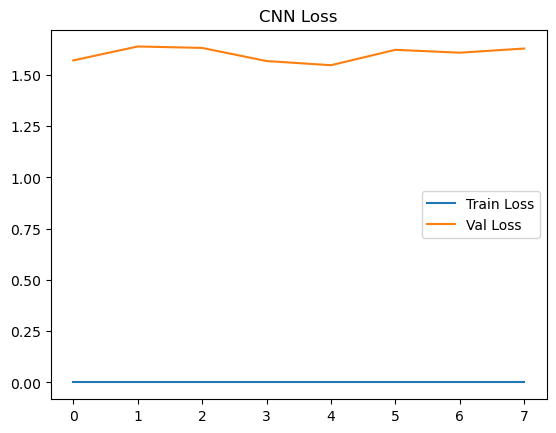

In [19]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.legend()
plt.show()
